<a href="https://colab.research.google.com/github/lucammarini/HPa/blob/main/HPa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HPa** 
---
☣
**Simulador de partículas com features de:**
* Atração;
* Repulsão;
* Limites de parede;

## IMPORTS

In [ ]:
#### IMPORT DE BIBLIOTECAS
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import pandas as pd

## FUNÇÕES

In [ ]:
def frame(w):
    """Define a localização do frame atual e plota o gráfico"""
    ax.clear()
    global N,df
    
    df = position(N,df)

    x = df['x_i+1']
    y = df['y_i+1']
    carga = df['carga']
    carga_valor = df['carga_valor']

    plt.title("Particle Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim(0,larg)
    ax.set_ylabel('Y(t)')
    ax.set_ylim(0,larg)
   
    colors = {'positivo':'red', 'negativo':'blue'}
    plot = ax.scatter(x, y, c=df['carga'].map(colors))

    return plot

In [ ]:
def position(N,df):
    """Pega a posição atual das partículas e retorna a próxima posição"""
    global G

    for partic in range(0,len(df.index)):
      # force reset
      Fx = Fy = 0

      # ATRAÇÃO E REPULSÃO EIXO X E Y
      Fx, theta = forca_atracao_repulsao(Fx, 'x', df, partic)
      Fy, theta = forca_atracao_repulsao(Fy, 'y', df, partic)

      df.at[partic,'Fx'] = Fx
      df.at[partic,'Fy'] = Fy
      df.at[partic,'Theta'] = theta

    # PRÓXIMA POSIÇÃO
    passo = 0.00002
    df['x_i+1'] = df['x_i'] + passo * df['Fx'] 
    df['y_i+1'] = df['y_i'] + passo * df['Fy']

    # EFEITO LIMITE FÍSICO DE BORDA
    df.loc[df['x_i+1'] > (larg)*0.99, 'x_i+1'] = (larg)*0.99
    df.loc[df['y_i+1'] > (larg)*0.99, 'y_i+1'] = (larg)*0.99
    df.loc[df['x_i+1'] < 0, 'x_i+1'] = 0
    df.loc[df['y_i+1'] < 0, 'y_i+1'] = 0

    # ATUALIZAÇÃO DA NOVA POSIÇÃO
    df['x_i'] = df['x_i+1']
    df['y_i'] = df['y_i+1']

    # display(df)
    # print('\n')

    return df

In [ ]:
def forca_atracao_repulsao(F, eixo, df , partic):
  """calcula a força de atração e repulsão no eixo em questão"""
  for interacao in range(0,len(df.index)):

    # DISTANCIA ENTRE PARTICULAS (r) E DIREÇÃO DA FORÇA (dir)
    rx = (df['x_i'][interacao] - df['x_i'][partic])
    ry = (df['y_i'][interacao] - df['y_i'][partic])
    rx_abs = abs(rx)
    ry_abs = abs(ry)

    try:
      r = (rx**2 + ry**2)**(0.5)
    except:
      r = 0

    dirx = 1*(rx >= 0) + (-1)*(rx < 0)
    diry = 1*(ry >= 0) + (-1)*(ry < 0)

    if rx_abs != 0:
      theta = np.arctan(ry_abs/rx_abs)
    else:
      theta = 0

    # DESCOBRIR A CARGA DE CADA PARTICULA
    Q1_carga = 1*(df['carga'][partic]    == 'positivo') + (-1)*(df['carga'][partic]    == 'negativo')
    Q2_carga = 1*(df['carga'][interacao] == 'positivo') + (-1)*(df['carga'][interacao] == 'negativo')

    # APLICAR A CARGA (+ OU -) PARA O VALOR DE CARGA DE PARTICULA
    Q1 = Q1_carga * df['carga_valor'][partic]
    Q2 = Q2_carga * df['carga_valor'][interacao]

    # CÁLCULO DE FORÇA
    if r == 0:
      pass
    elif eixo == 'x':
      F = F + (np.cos(theta))*(dirx)*(-G)*Q1*Q2/r**2
    elif eixo == 'y':
      F = F + (np.sin(theta))*(diry)*(-G)*Q1*Q2/r**2

  if   eixo == 'x':
    return F, theta
  elif eixo == 'y':
    return F, theta

## CONDIÇÕES DE CONTORNO INICIAIS

* N: número de partículas
* x: posição no eixo x
* y: posição no eixo y


In [ ]:
# NÚMERO DE PARTICULAS NEGATIVAS
Nn = 5
# NÚMERO DE PARTÍCULAS POSITIVAS
Np = 5

# COEFICIENTE DE ATRAÇÃO E REPULSÃO
G = 8.99*10**9  # [N.m²/C²]
# CARGA POSITIVA
Qp = 2*10**-6  # [C]
# CARGA NEGATIVA
Qn = 4*10**-6  # [C]

# LARGURA DO QUADRADO 
larg = 0.5  # [m]

# MULTIPLICADORES DE ALEATORIEDADE
rand1 = (larg)*0.4
rand2 = 1


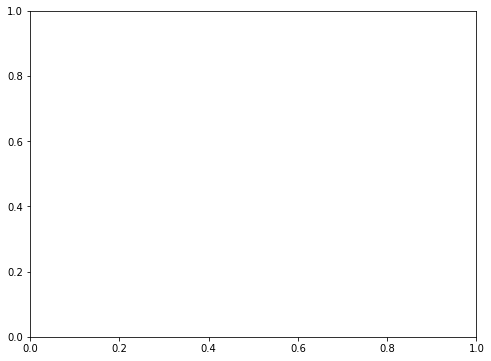

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# NUMERO DE PARTICULAS TOTAIS
N = Np + Nn

# POSIÇÕES INICIAIS:
x0_list = [float(rand1*np.random.random(rand2)) for x in range(0,N)]
y0_list = [float(rand1*np.random.random(rand2)) for x in range(0,N)]
pn_list = ['positivo' for x in range(0,Np)] + ['negativo' for x in range(0,Nn)]
carga_v_list = [Qp for x in range(0,Np)] + [Qn for x in range(0,Nn)]
Fx_list = [0 for x in range(0,N)]
Fy_list = [0 for x in range(0,N)]

df = pd.DataFrame({'x_i':x0_list, 
                   'y_i':y0_list, 
                   'carga':pn_list, 
                   'carga_valor':carga_v_list,
                   'Fx':Fx_list,
                   'Fy':Fy_list}) 


## ANIMAÇÃO EM TRANSIENTE

In [ ]:
anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)

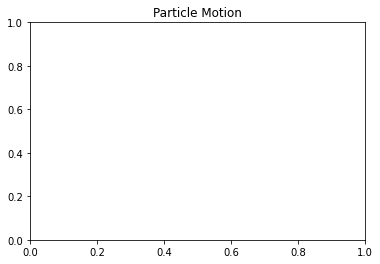

In [ ]:
anim